In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from fbprophet import Prophet # forecasting package developed at FB
from fbprophet.diagnostics import cross_validation, performance_metrics # Metrics to evaluate forecast
from fbprophet.plot import plot_cross_validation_metric # plot croosvalidation metric of prophet

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [24]:
data=pd.read_csv('/content/drive/MyDrive/csv files/construction_material_prices_2008_2018.csv', parse_dates=['Unnamed: 0'], dayfirst=True)
data.tail(50)

,Unnamed: 0,price_steel,price_rebar,price_glass,price_concrete,price_plywood
2895,2018-04-10,NaN,38.00,NaN,NaN,10.833333
2896,2018-04-11,NaN,34.00,NaN,NaN,10.833333
2897,2018-04-12,NaN,31.50,NaN,NaN,10.625000
2898,2018-04-13,NaN,31.00,NaN,NaN,10.625000
2899,2018-04-16,NaN,31.00,NaN,NaN,11.500000
2900,2018-04-17,NaN,17.50,NaN,NaN,11.166667
2901,2018-04-18,12.250000,17.50,NaN,NaN,11.500000
2902,2018-04-19,12.250000,16.50,NaN,NaN,11.500000
2903,2018-04-20,12.250000,22.25,NaN,NaN,12.666667
2904,2018-04-23,13.750000,20.50,NaN,NaN,14.666667


In [25]:
# finding null values
data.isnull().sum()

Unnamed: 0           0
price_steel        636
price_rebar       1296
price_glass       1473
price_concrete    1498
price_plywood      272
dtype: int64

In [26]:
# finding the data types of the instances
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2945 entries, 0 to 2944
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      2945 non-null   datetime64[ns]
 1   price_steel     2309 non-null   float64       
 2   price_rebar     1649 non-null   float64       
 3   price_glass     1472 non-null   float64       
 4   price_concrete  1447 non-null   float64       
 5   price_plywood   2673 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 138.2 KB


In [27]:
# renaming first column as date
data.rename(columns={'Unnamed: 0':'date'}, inplace=True)

data.columns

Index(['date', 'price_steel', 'price_rebar', 'price_glass', 'price_concrete',
       'price_plywood'],
      dtype='object')

In [28]:
# creating dataframe for each material and treat each material separate

# plot the features against date
features = data.drop('date', axis=1)
date = data.date

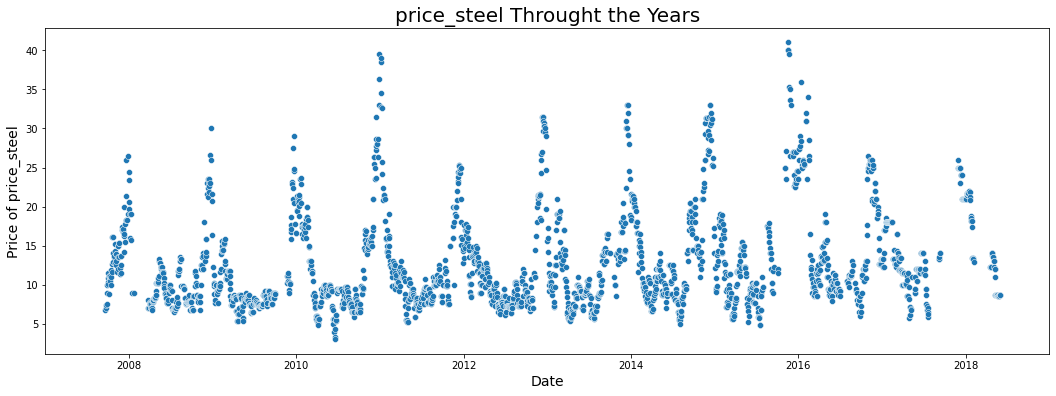

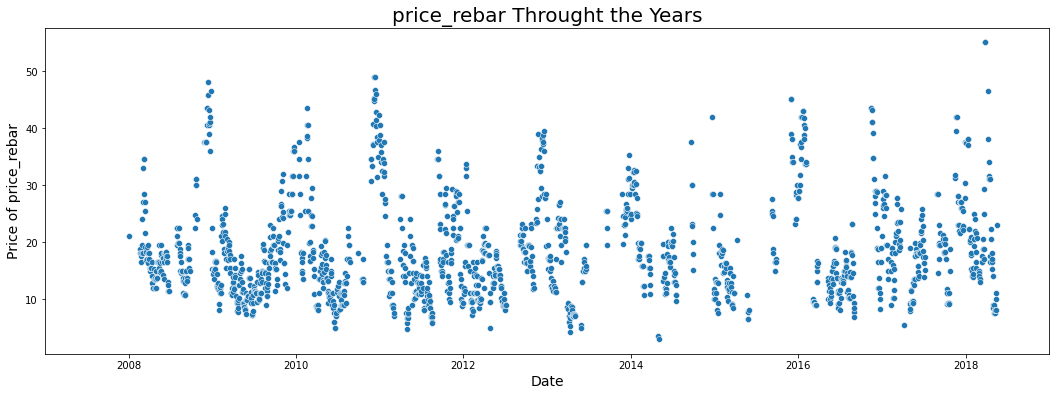

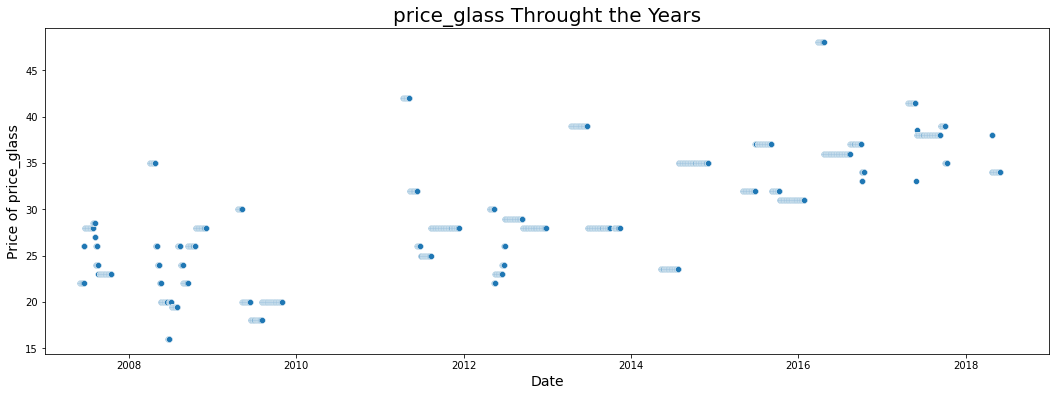

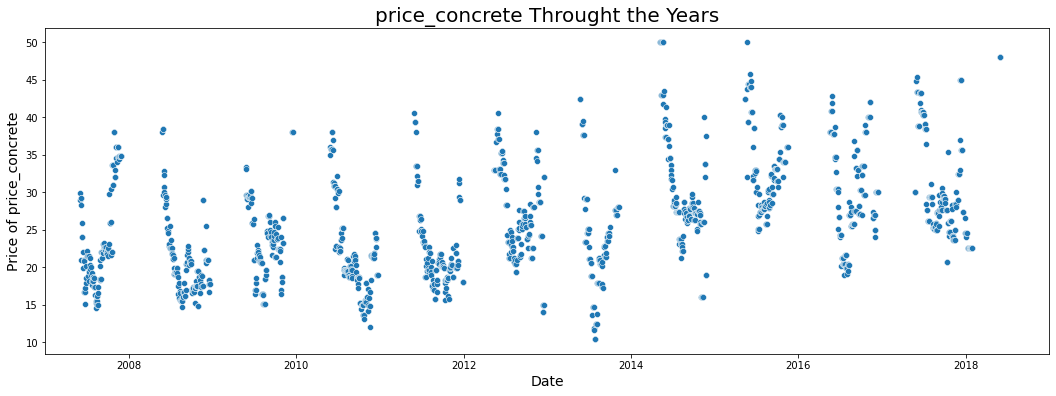

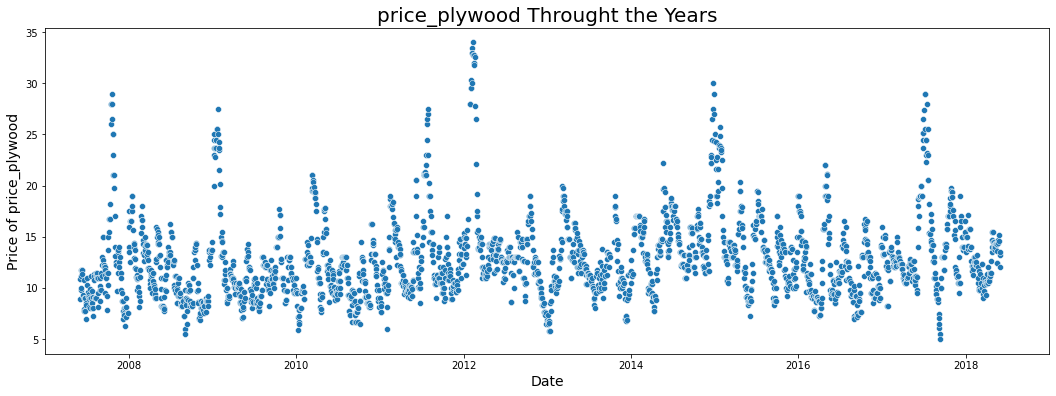

In [29]:
for col in features.columns:
    p=plt.figure(figsize=(18,6))
    
    p = sns.scatterplot(x=date, y=features[col], marker='o')
    
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price of '+col, fontsize=14)
    plt.title(col+' Throught the Years', fontsize=20)
    p.set_xlim(pd.Timestamp('2007-01-01'), pd.Timestamp('2019-01-01'))
    
    plt.show(p)

Data shows some seasonality. Although in the case of glass, data is very scatter. So I think because of the potential seasonality prophet may be a good package to forecast pricing

In [30]:
# creating a dataframe for each material with date
data_steel = data[['date', 'price_steel']]
data_rebar = data[['date', 'price_rebar']]
data_glass = data[['date', 'price_glass']]
data_concrete = data[['date', 'price_concrete']]
data_plywood = data[['date', 'price_plywood']]

In [31]:
print(data_steel.shape)
print(data_rebar.shape)
print(data_glass.shape)
print(data_concrete.shape)
print(data_plywood.shape)

(2945, 2)
(2945, 2)
(2945, 2)
(2945, 2)
(2945, 2)



**Data preprocesing:**
For modeling I will first log transform the data. This helps convert non stationary data into stationary
To plot the data 
I will inverse log transform the data so that the plots show meaningful numbers. 
I will also plot inverse log transform metrics so that they show meaningful values

In [32]:
data_steel.columns=['ds','y']
data_steel['y_orig'] = data_steel.y #keeping original data in df
data_steel.y = np.log(data_steel.y) #log transform data
data_steel = data_steel.dropna()
data_steel.tail()

,ds,y,y_orig
2927,2018-05-24,2.140066,8.50
2928,2018-05-25,2.140066,8.50
2929,2018-05-29,2.169054,8.75
2930,2018-05-30,2.169054,8.75
2931,2018-05-31,2.169054,8.75


In [33]:
# Making the Prophet model and I am fitting it.
steel_model = Prophet()
steel_model.fit(data_steel)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
# I am making a future data frame. I am interested in forecasting 6 months = 182.5 days
# This will create a df with size months worth of dates.
steel_future = steel_model.make_future_dataframe(periods=183)
steel_future.tail()

,ds
2487,2018-11-26
2488,2018-11-27
2489,2018-11-28
2490,2018-11-29
2491,2018-11-30


In [35]:
# predicting values for those six months
steel_forecast = steel_model.predict(steel_future)
steel_forecast_orig = steel_forecast #create a copy  of prediction df

# inverse log transform the predictions
steel_forecast_orig[['yhat', 'yhat_lower', 'yhat_upper']] = np.exp(steel_forecast_orig[['yhat', 'yhat_lower', 'yhat_upper']])
steel_forecast_orig[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2487,2018-11-26,21.252067,15.093180,28.562459
2488,2018-11-27,21.622099,15.867583,30.035681
2489,2018-11-28,21.688645,15.596515,29.661690
2490,2018-11-29,21.640765,16.067170,29.851656
2491,2018-11-30,21.549945,15.757387,29.902866


Text(0.5, 1.0, 'Forecast of Steel Price')

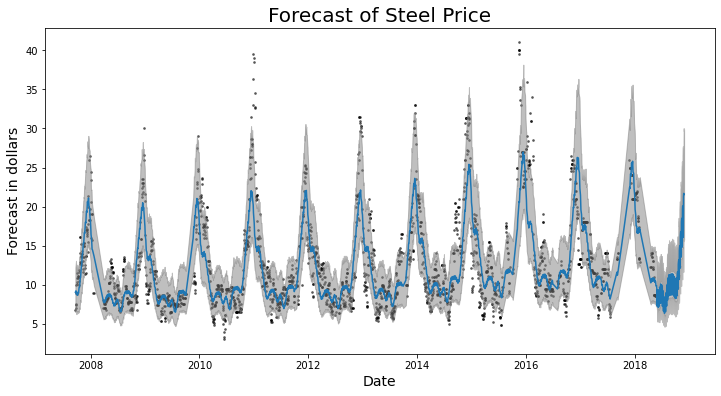

In [37]:
# plotting predictions and historic data
plt.figure(figsize=(12,6))
plt.plot(steel_forecast_orig.ds, steel_forecast_orig.yhat)
plt.scatter(data_steel.ds, data_steel.y_orig, color='k', alpha=0.5, s=3)

# plotting upper/lower bounds
plt.fill_between(steel_forecast_orig.ds, steel_forecast_orig.yhat_lower,steel_forecast_orig.yhat_upper,
                 color='gray', alpha=0.5)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Forecast in dollars', fontsize=14)
plt.title('Forecast of Steel Price', fontsize=20)

(736695.0, 737119.0)

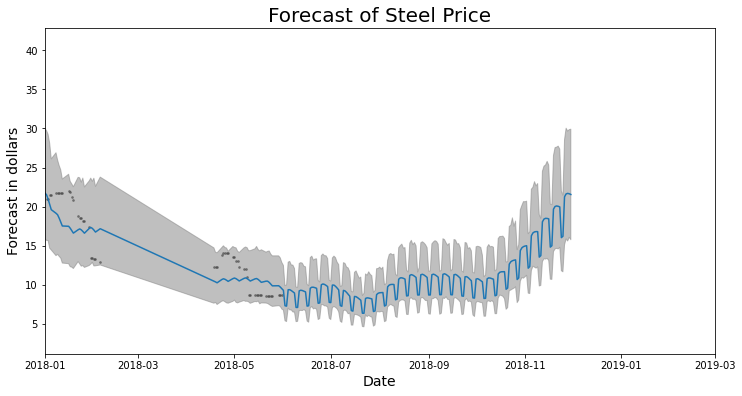

In [38]:
# Doing a closeup in prediction to see distribution of forescated value and using this to make recommendations.
plt.figure(figsize=(12,6))
plt.plot(steel_forecast_orig.ds, steel_forecast_orig.yhat)
plt.scatter(data_steel.ds, data_steel.y_orig, color='k', alpha=0.5, s=3)

# plotting upper/lower bounds
plt.fill_between(steel_forecast_orig.ds, steel_forecast_orig.yhat_lower,steel_forecast_orig.yhat_upper,
                 color='gray', alpha=0.5)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Forecast in dollars', fontsize=14)
plt.title('Forecast of Steel Price', fontsize=20)
plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2019-03-01'))

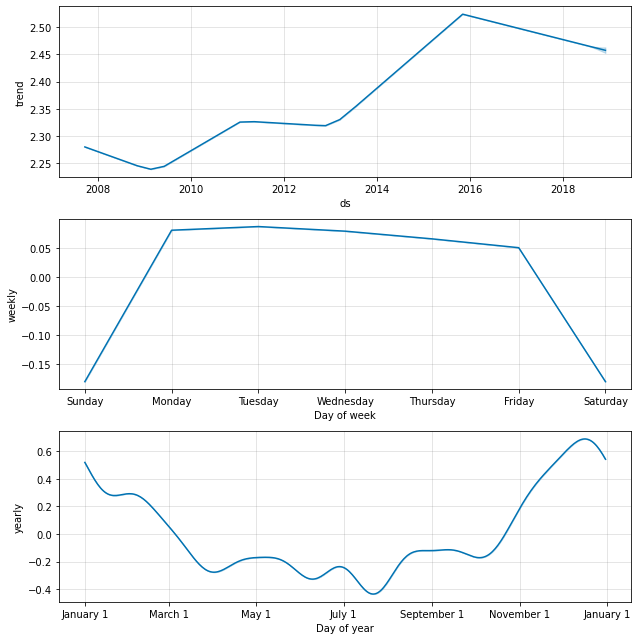

In [39]:
steel_components_plot=steel_model.plot_components(steel_forecast)

In [40]:
# Crossvalidating my  predictions.
# This will use 3 times horizon (1.5 years) as training data
steel_cv = cross_validation(steel_model, horizon='183 days')
steel_metrics = performance_metrics(steel_cv)
steel_metrics.head(5)

INFO:fbprophet:Making 35 forecasts with cutoffs between 2009-05-24 00:00:00 and 2017-11-29 00:00:00


  0%|          | 0/35 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,17 days 00:00:00,0.071154,0.266747,0.216934,0.088711,0.081709,0.626794
1,17 days 12:00:00,0.074144,0.272295,0.221640,0.091139,0.083704,0.615072
2,18 days 00:00:00,0.074555,0.273048,0.221434,0.090803,0.082459,0.614474
3,18 days 12:00:00,0.078765,0.280650,0.227748,0.093786,0.086300,0.606220
4,19 days 00:00:00,0.077922,0.279144,0.226109,0.092867,0.083961,0.613397


(0.1, 0.4)

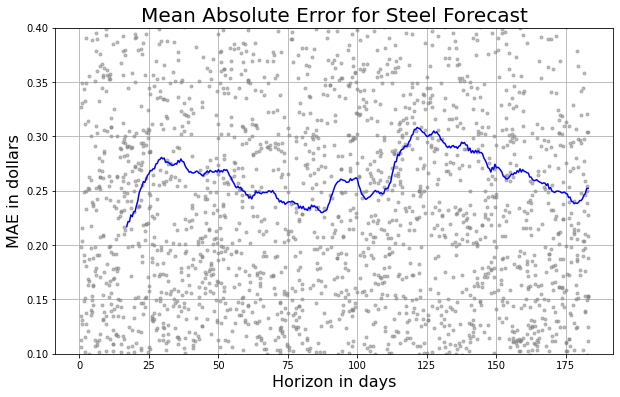

In [41]:
plot_cross_validation_metric(steel_cv, metric='mae')
plt.xlabel('Horizon in days', fontsize=16)
plt.ylabel('MAE in dollars', fontsize=16)
plt.title('Mean Absolute Error for Steel Forecast', fontsize=20)
plt.ylim(0.1,0.4)

Peformance of the forecast for steel is quite impressive. The error is between 20 and 33 cents or less than 0.2%
I will use the same procesure as before to forescast the rest of the materials.

In [42]:
data_rebar.columns=['ds','y']
data_rebar['y_orig'] = data_rebar['y']
data_rebar['y'] = np.log(data_rebar['y'])
data_rebar = data_rebar.dropna()
data_rebar.head()

,ds,y,y_orig
258,2008-01-03,3.044522,21.00
290,2008-02-20,2.931194,18.75
291,2008-02-21,2.890372,18.00
292,2008-02-22,2.862201,17.50
293,2008-02-25,2.890372,18.00


In [43]:
rebar_model = Prophet()
rebar_model.fit(data_rebar)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
rebar_future = rebar_model.make_future_dataframe(periods=183)
rebar_future.tail()

,ds
1827,2018-11-13
1828,2018-11-14
1829,2018-11-15
1830,2018-11-16
1831,2018-11-17


In [45]:
rebar_forecast = rebar_model.predict(rebar_future)
rebar_forecast_orig = rebar_forecast

# inverse log transform prediction
rebar_forecast_orig[['yhat', 'yhat_lower', 'yhat_upper']] = np.exp(rebar_forecast_orig[['yhat', 'yhat_lower', 'yhat_upper']])
steel_forecast_orig[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2487,2018-11-26,21.252067,15.093180,28.562459
2488,2018-11-27,21.622099,15.867583,30.035681
2489,2018-11-28,21.688645,15.596515,29.661690
2490,2018-11-29,21.640765,16.067170,29.851656
2491,2018-11-30,21.549945,15.757387,29.902866


Text(0.5, 1.0, 'Forecast of Rebar Price')

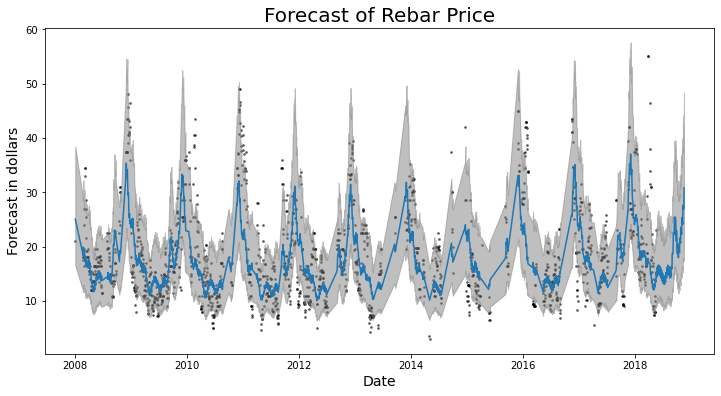

In [46]:
# plotting prediction, upper/lower bounds and historic data
plt.figure(figsize=(12,6))
plt.plot(rebar_forecast_orig.ds, rebar_forecast_orig.yhat)
plt.scatter(data_rebar.ds, data_rebar.y_orig, color='k', alpha=0.5, s=3)

# plotting upper/lower bounds
plt.fill_between(rebar_forecast_orig.ds, rebar_forecast_orig.yhat_lower,rebar_forecast_orig.yhat_upper,
                 color='gray', alpha=0.5)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Forecast in dollars', fontsize=14)
plt.title('Forecast of Rebar Price', fontsize=20)

(736695.0, 737119.0)

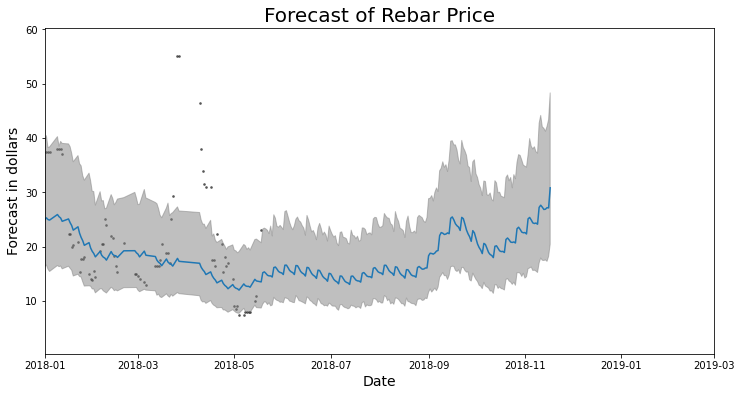

In [47]:
plt.figure(figsize=(12,6))
plt.plot(rebar_forecast_orig.ds, rebar_forecast_orig.yhat)
plt.scatter(data_rebar.ds, data_rebar.y_orig, color='k', alpha=0.5, s=3)

# plotting upper/lower bounds
plt.fill_between(rebar_forecast_orig.ds, rebar_forecast_orig.yhat_lower,rebar_forecast_orig.yhat_upper,
                 color='gray', alpha=0.5)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Forecast in dollars', fontsize=14)
plt.title('Forecast of Rebar Price', fontsize=20)
plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2019-03-01'))

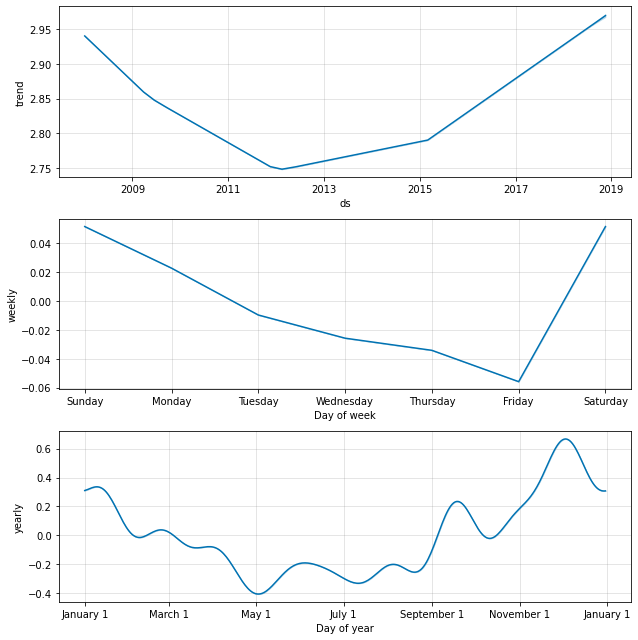

In [48]:
rebar_components_plot=rebar_model.plot_components(rebar_forecast)

In [49]:
rebar_cv = cross_validation(rebar_model, horizon='183 days')
rebar_metrics = performance_metrics(rebar_cv)
rebar_metrics.head(5)

INFO:fbprophet:Making 34 forecasts with cutoffs between 2009-08-10 12:00:00 and 2017-11-16 00:00:00


  0%|          | 0/34 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,18 days 12:00:00,0.172796,0.415687,0.344627,0.129673,0.111015,0.604780
1,19 days 00:00:00,0.174021,0.417158,0.347202,0.130556,0.112900,0.600889
2,19 days 12:00:00,0.180909,0.425334,0.351708,0.133136,0.115411,0.592551
3,20 days 00:00:00,0.179845,0.424081,0.349814,0.132467,0.111728,0.588521
4,20 days 12:00:00,0.185796,0.431041,0.354723,0.134670,0.112301,0.584769


(0.3, 0.5)

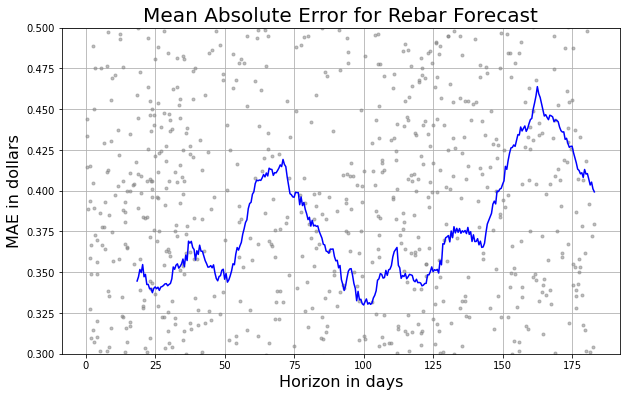

In [50]:
plot_cross_validation_metric(rebar_cv, metric='mae')
plt.xlabel('Horizon in days', fontsize=16)
plt.ylabel('MAE in dollars', fontsize=16)
plt.title('Mean Absolute Error for Rebar Forecast', fontsize=20)
plt.ylim(0.3, 0.5)

In [51]:
data_glass.columns=['ds','y']
data_glass['y_orig'] = data_glass['y']
data_glass['y'] = np.log(data_glass['y'])
data_glass = data_glass.dropna()

In [52]:
data_glass.head()

,ds,y,y_orig
105,2007-06-01,3.091042,22.0
106,2007-06-04,3.091042,22.0
107,2007-06-05,3.091042,22.0
108,2007-06-06,3.091042,22.0
109,2007-06-07,3.091042,22.0


In [53]:
glass_model = Prophet()
glass_model.fit(data_glass)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [54]:
glass_future = glass_model.make_future_dataframe(periods=183)
glass_future.tail()

,ds
1650,2018-11-26
1651,2018-11-27
1652,2018-11-28
1653,2018-11-29
1654,2018-11-30


In [55]:
glass_forecast = glass_model.predict(glass_future)
glass_forecast_orig = glass_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# inverse log transform prediction
glass_forecast_orig[['yhat', 'yhat_lower', 'yhat_upper']] = np.exp(glass_forecast_orig[['yhat', 'yhat_lower', 'yhat_upper']])
glass_forecast_orig[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1650,2018-11-26,38.892992,32.980842,44.893526
1651,2018-11-27,38.590191,33.630554,44.339451
1652,2018-11-28,38.520607,33.102775,44.032436
1653,2018-11-29,38.403633,33.177687,44.381985
1654,2018-11-30,38.414861,33.456309,44.341598


Text(0.5, 1.0, 'Forecast of Glass Price')

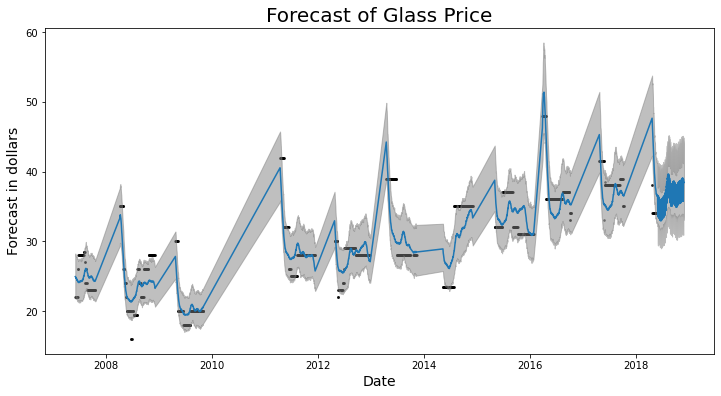

In [56]:
# plotting prediction, upper/lower bounds and historic data
plt.figure(figsize=(12,6))
plt.plot(glass_forecast_orig.ds, glass_forecast_orig.yhat)
plt.scatter(data_glass.ds, data_glass.y_orig, color='k', alpha=0.5, s=3)

# plotting upper/lower bounds
plt.fill_between(glass_forecast_orig.ds, glass_forecast_orig.yhat_lower,glass_forecast_orig.yhat_upper,
                 color='gray', alpha=0.5)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Forecast in dollars', fontsize=14)
plt.title('Forecast of Glass Price', fontsize=20)

(736695.0, 737119.0)

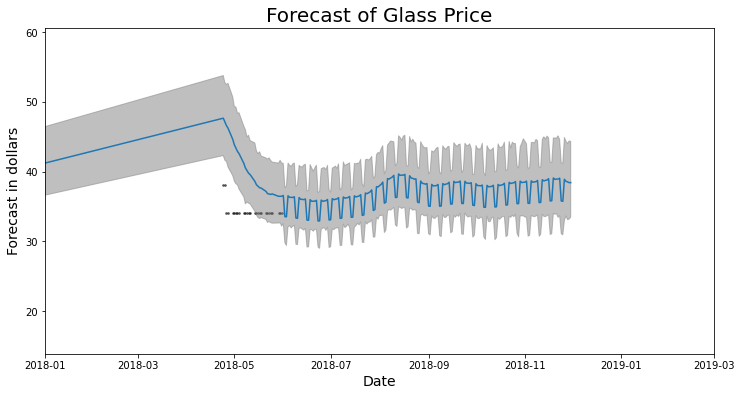

In [58]:
# plot prediction, upper/lower bounds and historic data
plt.figure(figsize=(12,6))
plt.plot(glass_forecast_orig.ds, glass_forecast_orig.yhat)
plt.scatter(data_glass.ds, data_glass.y_orig, color='k', alpha=0.5, s=3)

# plotting upper/lower bounds
plt.fill_between(glass_forecast_orig.ds, glass_forecast_orig.yhat_lower,glass_forecast_orig.yhat_upper,
                 color='gray', alpha=0.5)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Forecast in dollars', fontsize=14)
plt.title('Forecast of Glass Price', fontsize=20)
plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp('2019-03-01'))

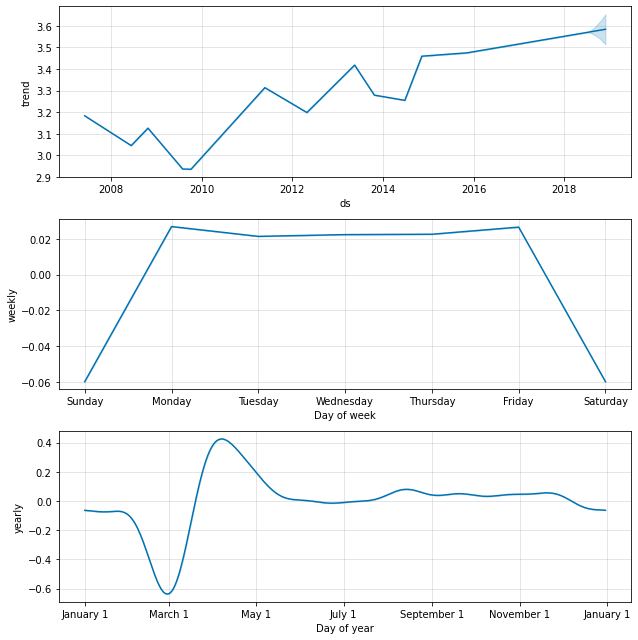

In [59]:
glass_components_plot=glass_model.plot_components(glass_forecast)

In [60]:
glass_cv = cross_validation(glass_model, horizon='183 days')
glass_metrics = performance_metrics(glass_cv)
glass_metrics.head(5)

INFO:fbprophet:Making 31 forecasts with cutoffs between 2009-01-28 12:00:00 and 2017-11-29 00:00:00


  0%|          | 0/31 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,19 days 00:00:00,0.018030,0.134274,0.112324,0.032649,0.028192,0.525862
1,19 days 12:00:00,0.018287,0.135228,0.112435,0.032668,0.028637,0.526478
2,20 days 00:00:00,0.018006,0.134187,0.111923,0.032570,0.028637,0.534483
3,20 days 12:00:00,0.018219,0.134976,0.111989,0.032585,0.028192,0.535920
4,21 days 00:00:00,0.018485,0.135960,0.112988,0.032875,0.029142,0.538793


(0.0, 0.5)

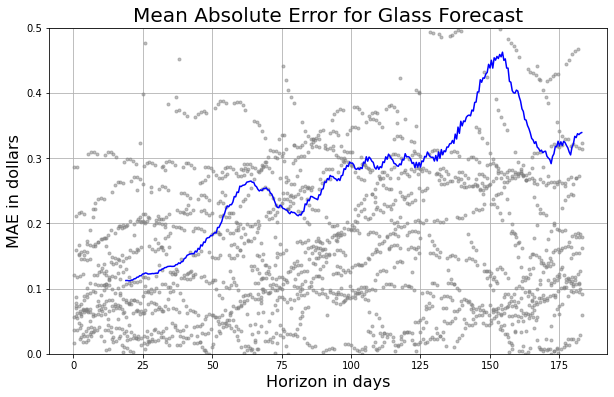

In [61]:
plot_cross_validation_metric(glass_cv, metric='mae')
plt.xlabel('Horizon in days', fontsize=16)
plt.ylabel('MAE in dollars', fontsize=16)
plt.title('Mean Absolute Error for Glass Forecast', fontsize=20)
plt.ylim(0,0.5)


Glass forecasting shoes good performance. The error is between 10 and 50 cents or less than 0.2%